In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
import collections 
import numpy as np
import matplotlib.patches as mpatches


In [2]:
# Read in data
nba = pd.read_csv('nba_total.csv')
nba.head()

,Year,Team,G,W,L,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2018-19,Milwaukee Bucks*,82,60,22,19780,3555,7471,0.476,1105,...,0.773,762,3316,4078,2136,615,486,1137,1608,9686
1,2018-19,Golden State Warriors*,82,57,25,19805,3612,7361,0.491,1087,...,0.801,797,2990,3787,2413,625,525,1169,1757,9650
2,2018-19,New Orleans Pelicans,82,33,49,19755,3581,7563,0.473,842,...,0.761,909,2969,3878,2216,610,441,1215,1732,9466
3,2018-19,Philadelphia 76ers*,82,51,31,19805,3407,7233,0.471,889,...,0.771,892,3025,3917,2207,606,432,1223,1745,9445
4,2018-19,Los Angeles Clippers*,82,48,34,19830,3384,7178,0.471,821,...,0.792,796,2936,3732,1970,561,385,1193,1913,9442


In [3]:
def create_df(team):
    noPlayoff = nba[nba['Team'] == team]
    playoff = nba[nba['Team'] == (team + "*")]

    name = noPlayoff.append(playoff)
    
    return name 


In [4]:
def plot_divison(div, division, colList):
    col = 0
    for team in div:
        g_dic = {}
        playoffs = []
        for row in range(5):
            g_dic[team.iloc[row]["Year"]] = team.iloc[row]["W"]
            if('*' in team.iloc[row]["Team"]):
                playoffs.append(team.iloc[row]["Year"])


        od = (sorted(g_dic.items()))

        x= [1,2,3,4,5]
        y = []
        yrs = []
        yrs_playoff = []
        num = 0
        for i in od:
            yrs.append(i[0])
            y.append(i[1])
            if(i[0] in playoffs):
                yrs_playoff.append(num)
            num +=1

        plt.figure(1, figsize = (15,10))
        plt.xticks(x, yrs)
        plt.plot(x,y, color = colList[col])
        for i in range(5):
            if(i in yrs_playoff):
                plt.plot(i+1, y[i], marker ='*', markersize =20, color = colList[col]) 
            else:
                plt.plot(i+1, y[i], marker = 'o', markersize =15, color = colList[col]) 
        col +=1 

    plt.ylim(5,75)
    t1 = mpatches.Patch(color=colList[0], label= division[0])
    t2 = mpatches.Patch(color=colList[1], label= division[1])
    t3 = mpatches.Patch(color=colList[2], label= division[2])
    t4 = mpatches.Patch(color=colList[3], label= division[3])
    t5 = mpatches.Patch(color=colList[4], label= division[4])
    plt.xlabel("Year", size = 15)
    plt.ylabel("Wins", size = 15)
    plt.title(division[5] + " Division Wins Over Time", size = 27)
    plt.legend(handles=[t1, t2, t3, t4, t5], loc = 'upper right', fancybox = True, shadow = True, facecolor = 'gainsboro', prop={'size': 12})       
    plt.show()

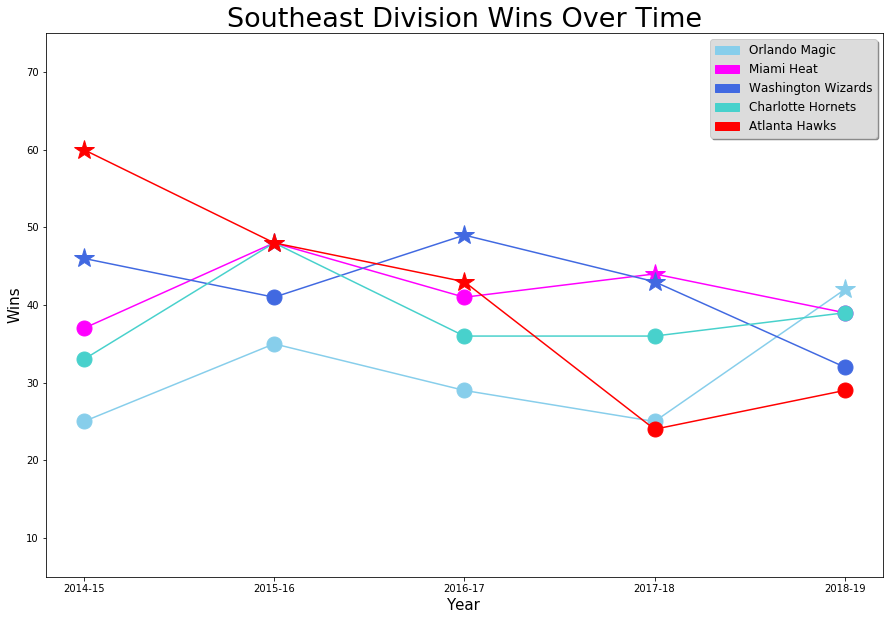

In [12]:
# Southeast Division 

magic = create_df("Orlando Magic")
heat = create_df("Miami Heat")
wizards = create_df("Washington Wizards")
hornets = create_df("Charlotte Hornets")
hawks = create_df("Atlanta Hawks")

southeast_div = [magic, heat, wizards, hornets, hawks]
southeast_names = ["Orlando Magic", "Miami Heat", "Washington Wizards", "Charlotte Hornets", "Atlanta Hawks", "Southeast"]
southeast_colList = ['skyblue', 'fuchsia', 'royalblue', 'mediumturquoise', 'red']

plot_divison(southeast_div, southeast_names, southeast_colList)


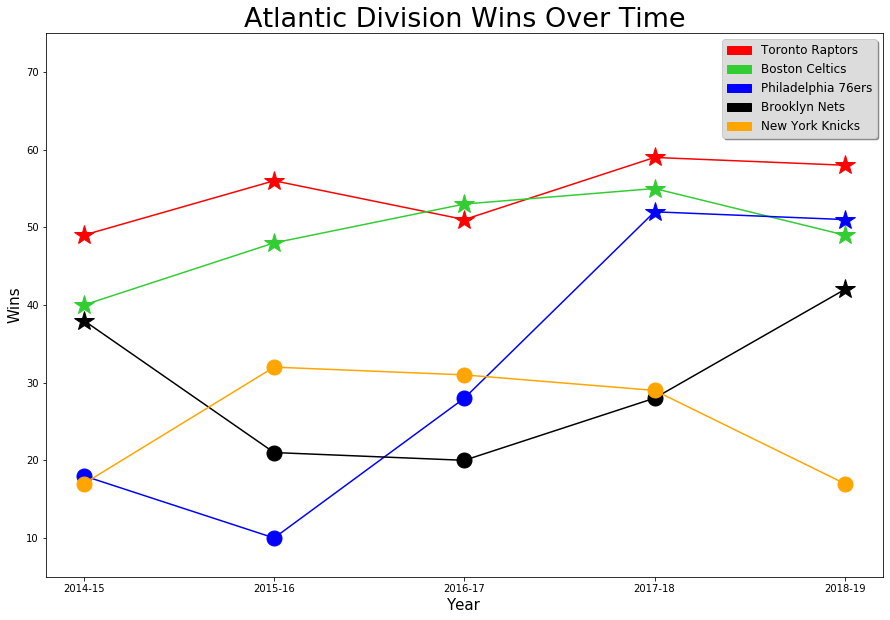

In [6]:
# Atlantic Division 

raptors = create_df("Toronto Raptors")
celtics = create_df("Boston Celtics")
sixers = create_df("Philadelphia 76ers")
nets = create_df("Brooklyn Nets")
knicks = create_df("New York Knicks")

atlantic_div = [raptors, celtics, sixers, nets, knicks]
atlantic_names = ["Toronto Raptors", "Boston Celtics", "Philadelphia 76ers", "Brooklyn Nets", "New York Knicks", "Atlantic"]
atlantic_colList = ['red', 'limegreen', 'blue', 'black', 'orange']

plot_divison(atlantic_div, atlantic_names, atlantic_colList)

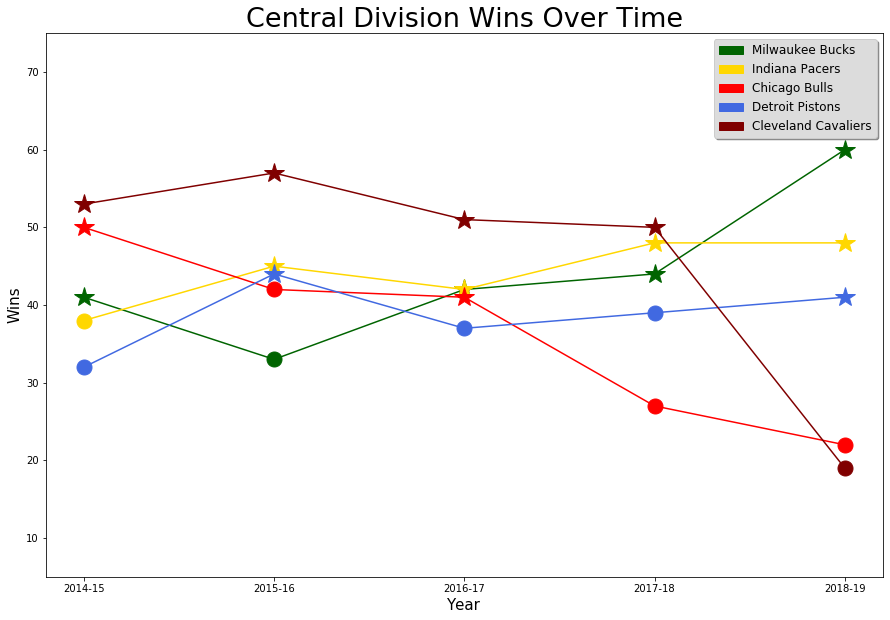

In [7]:
# Central Division 

bucks = create_df("Milwaukee Bucks")
pacers = create_df("Indiana Pacers")
bulls = create_df("Chicago Bulls")
pistons = create_df("Detroit Pistons")
cavs = create_df("Cleveland Cavaliers")

central_div = [bucks, pacers, bulls, pistons, cavs]
central_names = ["Milwaukee Bucks", "Indiana Pacers", "Chicago Bulls", "Detroit Pistons", "Cleveland Cavaliers", "Central"]
central_colList = ['darkgreen', 'gold', 'red', 'royalblue', 'maroon']

plot_divison(central_div, central_names, central_colList)

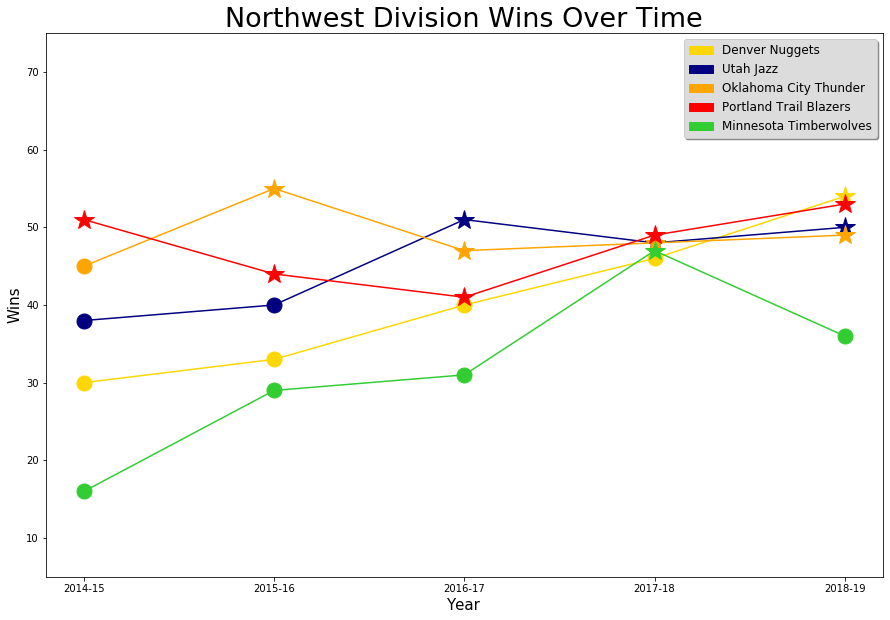

In [8]:
# Northwest Division 

nuggets = create_df("Denver Nuggets")
jazz = create_df("Utah Jazz")
thunder = create_df("Oklahoma City Thunder")
blazers = create_df("Portland Trail Blazers")
twolves = create_df("Minnesota Timberwolves")

northwest_div = [nuggets, jazz, thunder, blazers, twolves]
northwest_names = ["Denver Nuggets", "Utah Jazz", "Oklahoma City Thunder", "Portland Trail Blazers", "Minnesota Timberwolves", "Northwest"]
northwest_colList = ['gold', 'navy', 'orange', 'red', 'limegreen']

plot_divison(northwest_div, northwest_names, northwest_colList)

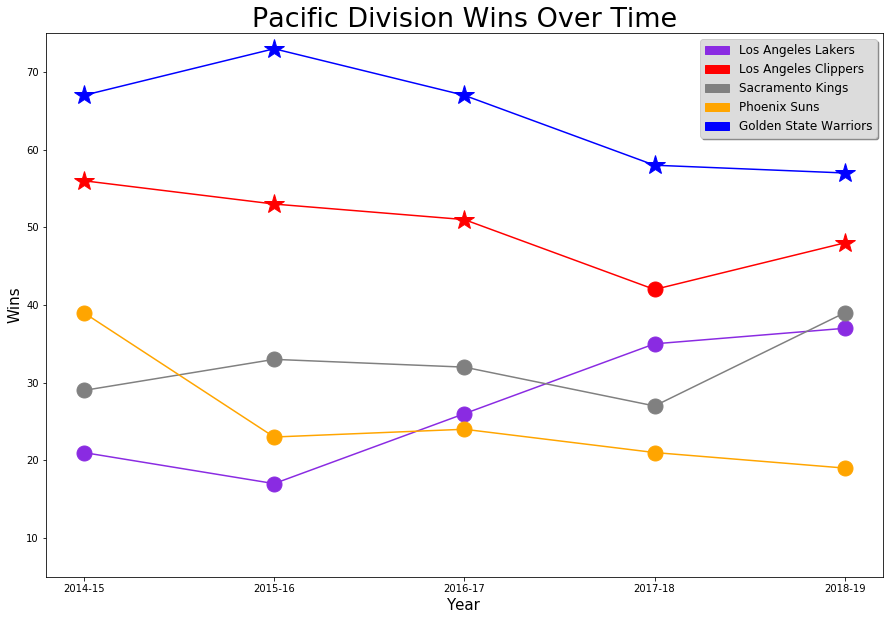

In [9]:
# Pacific Division 

lakers = create_df("Los Angeles Lakers")
clippers = create_df("Los Angeles Clippers")
kings = create_df("Sacramento Kings")
suns = create_df("Phoenix Suns")
warriors = create_df("Golden State Warriors")

pacific_div = [lakers, clippers, kings, suns, warriors]
pacific_names = ["Los Angeles Lakers", "Los Angeles Clippers", "Sacramento Kings", "Phoenix Suns", "Golden State Warriors", "Pacific"]
pacific_colList = ['blueviolet', 'red', 'gray', 'orange', 'blue']

plot_divison(pacific_div, pacific_names, pacific_colList)

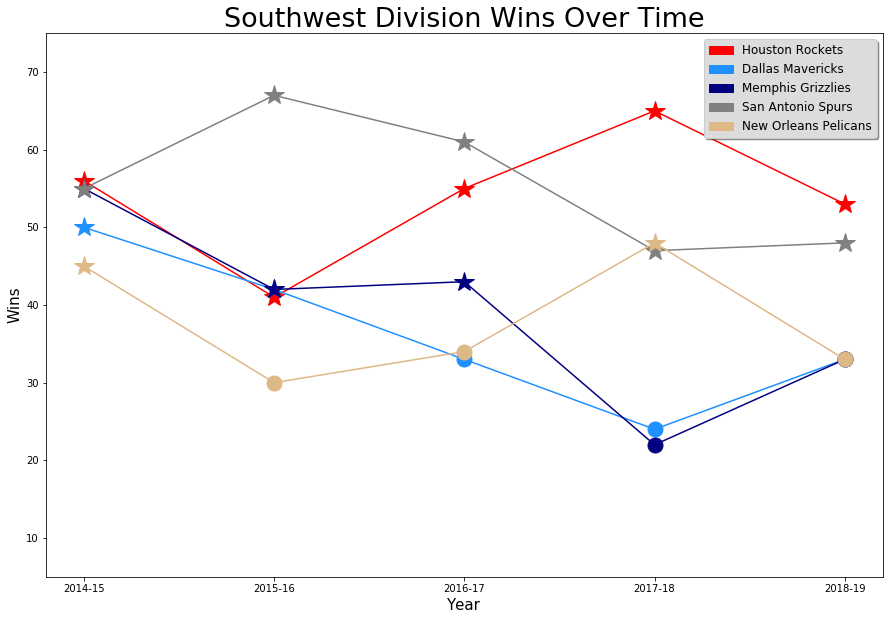

In [10]:
# Southwest Division 

rockets = create_df("Houston Rockets")
mavs = create_df("Dallas Mavericks")
grizz = create_df("Memphis Grizzlies")
spurs = create_df("San Antonio Spurs")
pelicans = create_df("New Orleans Pelicans")

southwest_div = [rockets, mavs, grizz, spurs, pelicans]
southwest_names = ["Houston Rockets", "Dallas Mavericks", "Memphis Grizzlies", "San Antonio Spurs", "New Orleans Pelicans", "Southwest"]
southwest_colList = ['red', 'dodgerblue', 'navy', 'gray', 'burlywood']

plot_divison(southwest_div, southwest_names, southwest_colList)